#### Import Dataset and Data Preprocessing

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('aug_2021_covid_sg_vax.csv')
df

,Date,Completed Full Regimen Vaccination Rate (%),Total Local Cases,Oxygen Supplements,ICU,Hospitalisation,Deaths (Without Vaccination or Partially Vaccinated),Deaths (With Vaccination),Total Deaths
0,1-Aug-21,61,113,35,8,43,0,0,0
1,2-Aug-21,62,106,36,7,43,1,0,1
2,3-Aug-21,63,98,37,7,44,1,0,1
3,4-Aug-21,64,92,42,7,49,0,0,0
4,5-Aug-21,65,96,40,8,48,1,0,1
5,6-Aug-21,67,93,38,7,45,1,0,1
6,7-Aug-21,68,75,38,4,42,1,0,1
7,8-Aug-21,69,73,37,8,45,0,0,0
8,9-Aug-21,70,69,35,10,45,0,0,0
9,10-Aug-21,72,53,32,11,43,0,0,0


In [20]:
df.dtypes

Date                                                    object
Completed Full Regimen Vaccination Rate (%)              int64
Total Local Cases                                        int64
Oxygen Supplements                                       int64
ICU                                                      int64
Hospitalisation                                          int64
Deaths (Without Vaccination or Partially Vaccinated)     int64
Deaths (With Vaccination)                                int64
Total Deaths                                             int64
dtype: object

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                                                    datetime64[ns]
Completed Full Regimen Vaccination Rate (%)                      int64
Total Local Cases                                                int64
Oxygen Supplements                                               int64
ICU                                                              int64
Hospitalisation                                                  int64
Deaths (Without Vaccination or Partially Vaccinated)             int64
Deaths (With Vaccination)                                        int64
Total Deaths                                                     int64
dtype: object

In [22]:
df

,Date,Completed Full Regimen Vaccination Rate (%),Total Local Cases,Oxygen Supplements,ICU,Hospitalisation,Deaths (Without Vaccination or Partially Vaccinated),Deaths (With Vaccination),Total Deaths
0,2021-08-01,61,113,35,8,43,0,0,0
1,2021-08-02,62,106,36,7,43,1,0,1
2,2021-08-03,63,98,37,7,44,1,0,1
3,2021-08-04,64,92,42,7,49,0,0,0
4,2021-08-05,65,96,40,8,48,1,0,1
5,2021-08-06,67,93,38,7,45,1,0,1
6,2021-08-07,68,75,38,4,42,1,0,1
7,2021-08-08,69,73,37,8,45,0,0,0
8,2021-08-09,70,69,35,10,45,0,0,0
9,2021-08-10,72,53,32,11,43,0,0,0


#### EDA

In [58]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows = 4, cols = 2, subplot_titles=['Completed Full Regimen Vaccination Rate (%)', 'Total Cases', 'Oxygen Supplements', 'ICU', 'Death (w/o vaccination or partially vaccinated)', 'Death (w vaccination)', 'Hospitalisation', 'Total Deaths'])

vac_rate = go.Scatter(x=df['Date'], y=df['Completed Full Regimen Vaccination Rate (%)'], name='Completed Full Regimen Vaccination Rate (%)')
total_cases = go.Bar(x=df['Date'],y=df['Total Local Cases'],name='Total Cases')
o2_supp = go.Bar(x=df['Date'],y=df['Oxygen Supplements'],name='Oxygen Supplements')
icu = go.Bar(x=df['Date'],y=df['ICU'],name='ICU')
death_wo_vax = go.Bar(x=df['Date'],y=df['Deaths (Without Vaccination or Partially Vaccinated)'],name='Death (w/o vaccination or partially vaccinated)')
death_w_vax = go.Bar(x=df['Date'],y=df['Deaths (With Vaccination)'],name='Death (w vaccination)')
hospitalisation = go.Bar(x=df['Date'],y=df['Hospitalisation'],name='Hospitalisation')
total_deaths = go.Bar(x=df['Date'],y=df['Total Deaths'],name='Total Deaths')

fig.add_trace(vac_rate,1,1)
fig.add_trace(total_cases,1,2)
fig.add_trace(o2_supp,2,1)
fig.add_trace(icu,2,2)
fig.add_trace(death_wo_vax,3,1)
fig.add_trace(death_w_vax,3,2)
fig.add_trace(hospitalisation,4,1)
fig.add_trace(total_deaths,4,2)

fig.update_layout(showlegend=False, margin=dict(l=20, r=20, t=20, b=20))
fig.show()

#### Correlation Analysis

<AxesSubplot:>

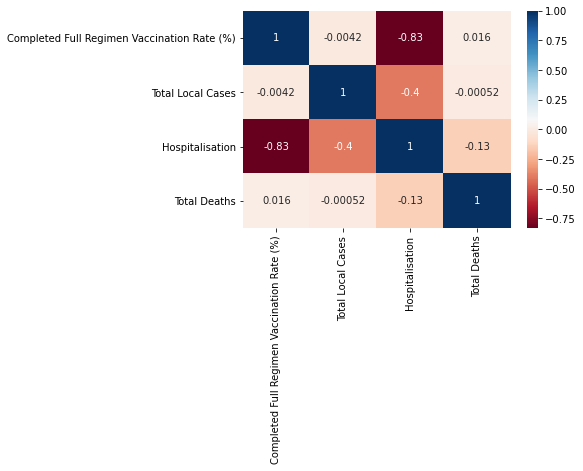

In [45]:
new_df = df[['Completed Full Regimen Vaccination Rate (%)', 'Total Local Cases', 'Hospitalisation', 'Total Deaths']]

corrMatrix = new_df.corr()
sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix.columns,
        yticklabels=corrMatrix.columns,
        cmap='RdBu', # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        annot=True)

<b> Correlation Relationship </b> <br>
0.0 to 0.19: Very weak<br>
0.2 to 0.39: Weak<br>
0.4 to 0.59: Moderate<br>
0.6 to 0.79: Strong<br>
0.8 to 1.0: Very strong

Vaccination Rate (%) vs Hospitalisation: <b>Very strong <i>negative</i></b> relationship<br>
Vaccination Rate (%) vs Total Local Cases: <b>Very weak <i>negative</i></b> relationship<br>
Vaccination Rate (%) vs Total Deaths: <b>Very weak <i>positive</i></b> relationship

#### Vaccination vs Hospitalisation

In [59]:
X = new_df['Hospitalisation'].to_numpy()
y = new_df['Completed Full Regimen Vaccination Rate (%)'].to_numpy()

X.shape, y.shape

((31,), (31,))

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(len(X), 1), y)
(model.intercept_,model.coef_[0])

(92.60596681393199, -0.5365894379944519)

In [61]:
model.score(X.reshape((len(X), 1)), y)

0.6929357516488285

R-Squared value of 0.693

In [63]:
predictions = model.predict(X.reshape((len(X),1)))
predictions.shape

(31,)

In [64]:
fig = go.Figure([go.Scatter(x=new_df['Hospitalisation'],y=new_df['Completed Full Regimen Vaccination Rate (%)'],mode='markers',name='Actual Covid-19 Hospitalisation'),
                go.Scatter(x=new_df['Hospitalisation'],y=predictions, name='Predicted Covid-19 Hospitalisation')])
fig.update_layout(title='Vaccination Rate (%) vs Covid-19 Hospitalisation in Singapore (August 2021)', xaxis_title='Covid-19 Hospitalisation', yaxis_title='Vaccination Rate (%)')
fig.show()

The chart shows a negative correlation between vaccination rate and hospitalisation. From the chart, it is evidently shown that vaccination has helped to reduce hospitalisation. Hence, it is important to get vaccinated to help stop the pandemic as it helps to prevent the onset symptoms of Covid-19 by reducing hospital admissions.

#### Vaccination vs Total Deaths

In [65]:
X = new_df['Total Deaths'].to_numpy()
y = new_df['Completed Full Regimen Vaccination Rate (%)'].to_numpy()

X.shape, y.shape

((31,), (31,))

In [66]:
model = LinearRegression()
model.fit(X.reshape(len(X), 1), y)
(model.intercept_,model.coef_[0])

(73.47794117647058, 0.12132352941176647)

In [67]:
model.score(X.reshape((len(X), 1)), y)

0.0002474919002651843

R-Squared value of 0.0002: No association between the variables

In [69]:
predictions = model.predict(X.reshape((len(X),1)))
predictions.shape

(31,)

In [70]:
fig = go.Figure([go.Scatter(x=new_df['Total Deaths'],y=new_df['Completed Full Regimen Vaccination Rate (%)'],mode='markers',name='Actual Covid-19 Deaths'),
                go.Scatter(x=new_df['Total Deaths'],y=predictions, name='Predicted Covid-19 Deaths')])
fig.update_layout(title='Vaccination Rate (%) vs Covid-19 Deaths in Singapore (August 2021)', xaxis_title='Covid-19 Deaths', yaxis_title='Vaccination Rate (%)')
fig.show()

The chart shows almost no correlation between vaccination rate and Covid-19 deaths. Hence, it is inappropriate to say that Covid-19 vaccines have resulted in Covid-19 deaths.

#### Vaccination vs Local Cases

In [71]:
X = new_df['Total Local Cases'].to_numpy()
y = new_df['Completed Full Regimen Vaccination Rate (%)'].to_numpy()

X.shape, y.shape

((31,), (31,))

In [72]:
model = LinearRegression()
model.fit(X.reshape(len(X), 1), y)
(model.intercept_,model.coef_[0])

(73.60514419756126, -0.0007009841133063677)

In [73]:
model.score(X.reshape((len(X), 1)), y)

1.7766179542078042e-05

R-Squared value of 0.00002: No association between the variables

In [75]:
predictions = model.predict(X.reshape((len(X),1)))
predictions.shape

(31,)

In [76]:
fig = go.Figure([go.Scatter(x=new_df['Total Local Cases'],y=new_df['Completed Full Regimen Vaccination Rate (%)'],mode='markers',name='Actual Covid-19 Local Cases'),
                go.Scatter(x=new_df['Total Local Cases'],y=predictions, name='Predicted Covid-19 Local Cases')])
fig.update_layout(title='Vaccination Rate (%) vs Covid-19 Local Cases in Singapore (August 2021)', xaxis_title='Covid-19 Local Cases', yaxis_title='Vaccination Rate (%)')
fig.show()

The chart shows almost no correlation between vaccination rate and Covid-19 deaths. Hence, it is inappropriate to say that Covid-19 vaccines have failed and led to the rising number of infectious Covid-19 cases.